In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# importowanie klas na potrzeby budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.random import set_seed

In [5]:
df = pd.read_csv("http://51.91.120.89/extras/train.csv")
df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [6]:
X = df.iloc[: , 2: ]
y = df.target.astype('int')

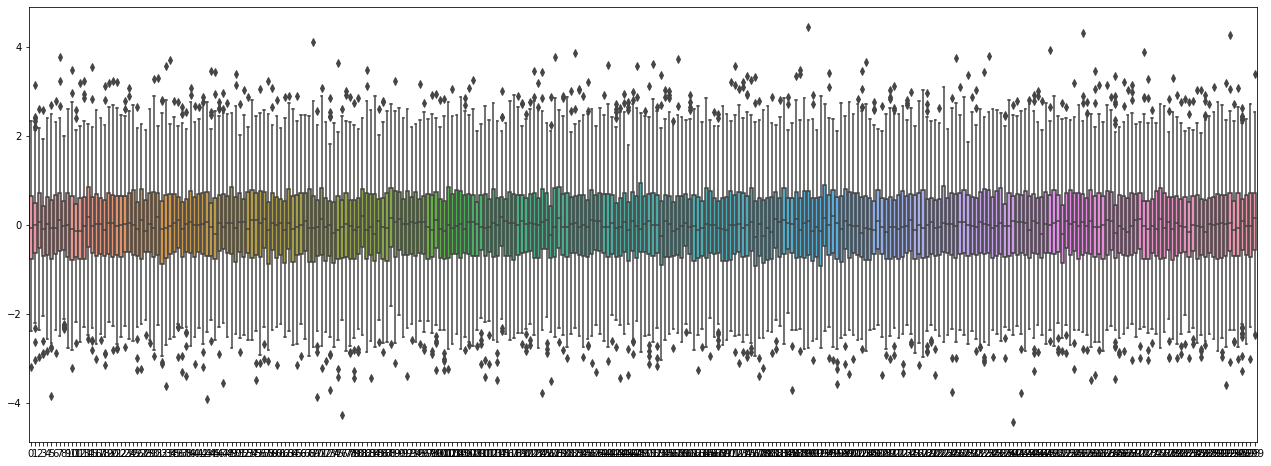

In [7]:
plt.figure(figsize=(22,8))
sns.boxplot(data=X)

In [16]:
X_scale = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

set_seed(0)
model = Sequential()
model.add( Dense(512, input_shape=[300], activation="relu") )

model.add( Dense(128, activation="relu") )
model.add( Dropout(0.2) )
model.add( Dense(64, activation="relu") )

model.add( Dense(1, activation="sigmoid") )

model.compile(loss="binary_crossentropy", metrics=["accuracy"])
#model.summary()

result = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0)

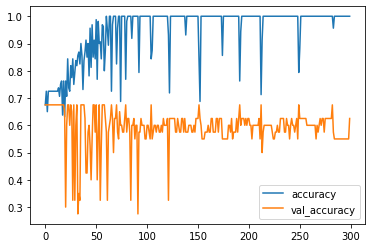

In [17]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy","val_accuracy"] ].plot()

In [20]:
X_scale = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

set_seed(0)
model = Sequential()
model.add( Dense(512, input_shape=[300], activation="relu") )
model.add( Dropout(0.05) )
model.add( Dense(16, activation="relu") )

model.add( Dense(1, activation="tanh") )

model.compile(loss="binary_crossentropy", metrics=["accuracy"])
#model.summary()

result = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0)

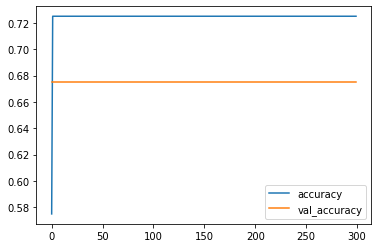

In [21]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy","val_accuracy"] ].plot()

In [23]:
# ekstracja cech zm. niezależnej
from sklearn.feature_selection import SelectKBest, chi2

In [42]:
X_best = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)

set_seed(0)
model = Sequential()
model.add( Dense(512, input_shape=[10], activation="relu") )
model.add( Dropout(0.35) )
model.add( Dense(16, activation="relu") )

model.add( Dense(1, activation="tanh") )

model.compile(loss="binary_crossentropy", metrics=["accuracy"])
#model.summary()

result = model.fit(X_best, y_train, epochs=100, validation_split=0.2, verbose=0)

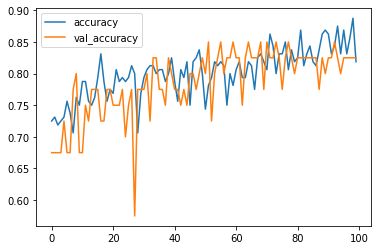

In [43]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy","val_accuracy"] ].plot()